In [ ]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report


warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
# Reading the data file
train=pd.read_csv(r"/content/train_HRAnalytics.csv")

In [ ]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


# Exploratory Data Analysis

In [ ]:
train.shape

(54808, 14)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [ ]:
train.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
mean,39195.830627,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000


In [ ]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

There are five categorical variables that need to encoded

1.  There are five categorical variables that need to encoded
  *   department 
  *   region
  *   education
  *   gender
  *   recruitment_channel

2.   Rest eight features are numerical.
3.   Inferred that there are no outliers that make significant difference in predictions 
4.  There are missing values in 'education' and 'previous_year_rating' columns







<Axes: xlabel='previous_year_rating', ylabel='Count'>

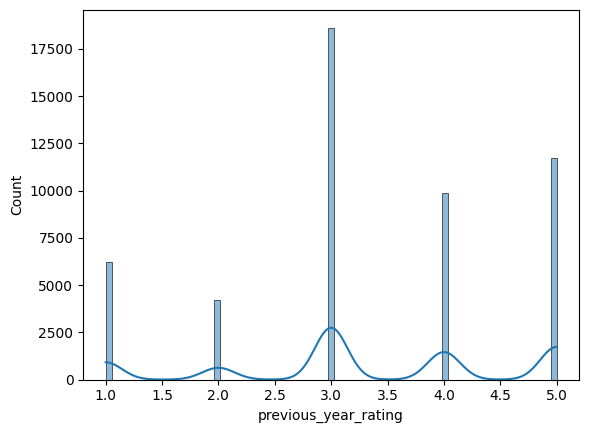

In [ ]:
sns.histplot(train['previous_year_rating'], kde=True)

In [ ]:
print(train.isna().mean().round(4) * 100)

employee_id             0.00
department              0.00
region                  0.00
education               4.40
gender                  0.00
recruitment_channel     0.00
no_of_trainings         0.00
age                     0.00
previous_year_rating    7.52
length_of_service       0.00
KPIs_met >80%           0.00
awards_won?             0.00
avg_training_score      0.00
is_promoted             0.00
dtype: float64


<Axes: xlabel='education', ylabel='Count'>

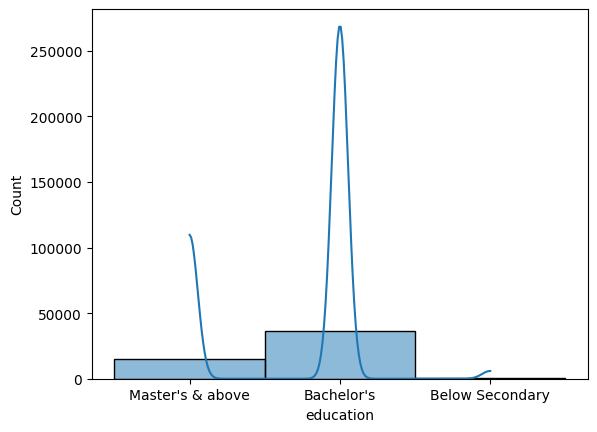

In [ ]:
sns.histplot(train['education'], kde=True)

In [ ]:
def impute_missing_values(train):
    # impute missing values for 'previous_year_rating' with the mean as data is normally distributed
    train['previous_year_rating'] = train['previous_year_rating'].fillna(train['previous_year_rating'].mean())
    
    # impute missing values for 'education' with the mode as it is categorical
    train['education'] = train['education'].fillna(train['education'].mode()[0])
    
    return train

In [ ]:
impute_missing_values(train)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,Bachelor's,m,sourcing,1,29,1.0,2,0,0,45,0


In [ ]:
# Cross-checking data for null values
train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [ ]:
# pip install pandas_profiling

In [ ]:
from pandas_profiling import ProfileReport
profile = ProfileReport(train, title="HRAnalytics")

In [ ]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

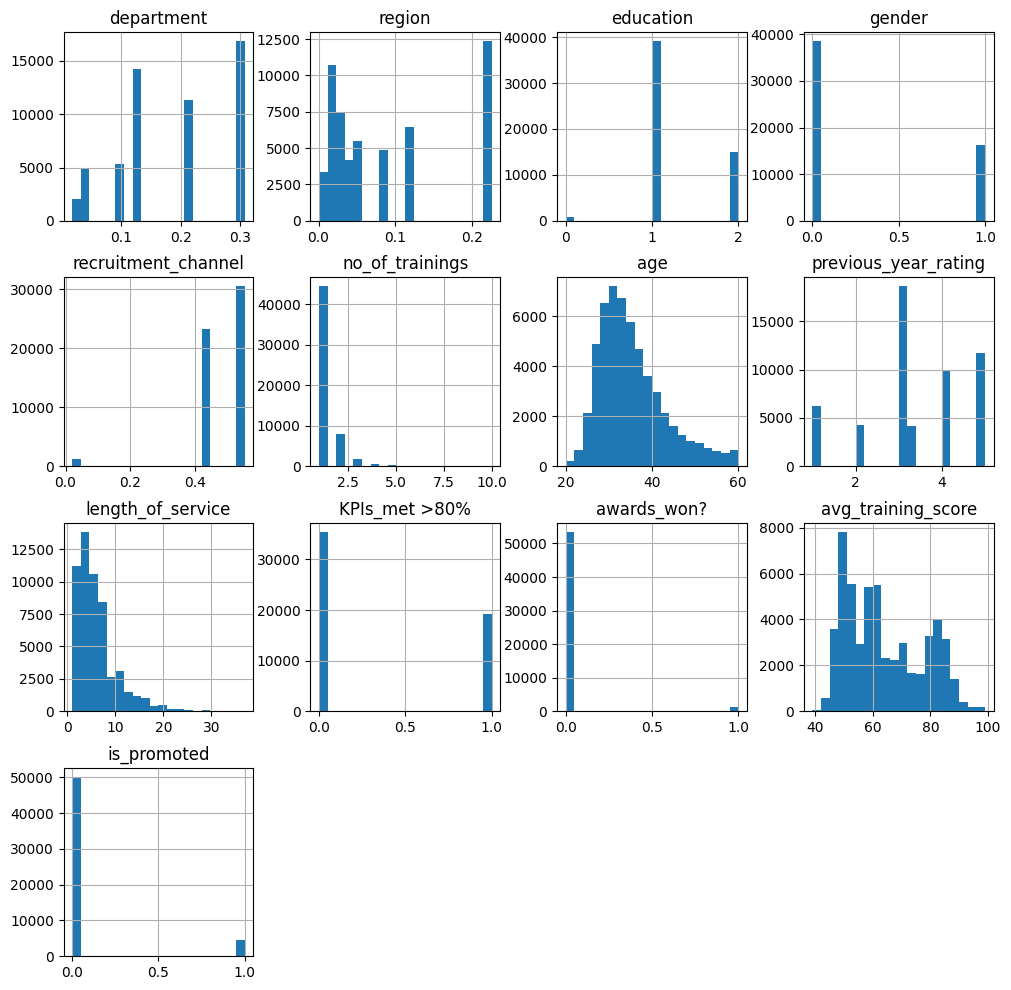

In [ ]:
# Checking the distibutions of data
train.hist(figsize=(12,12), bins=20)
plt.show()

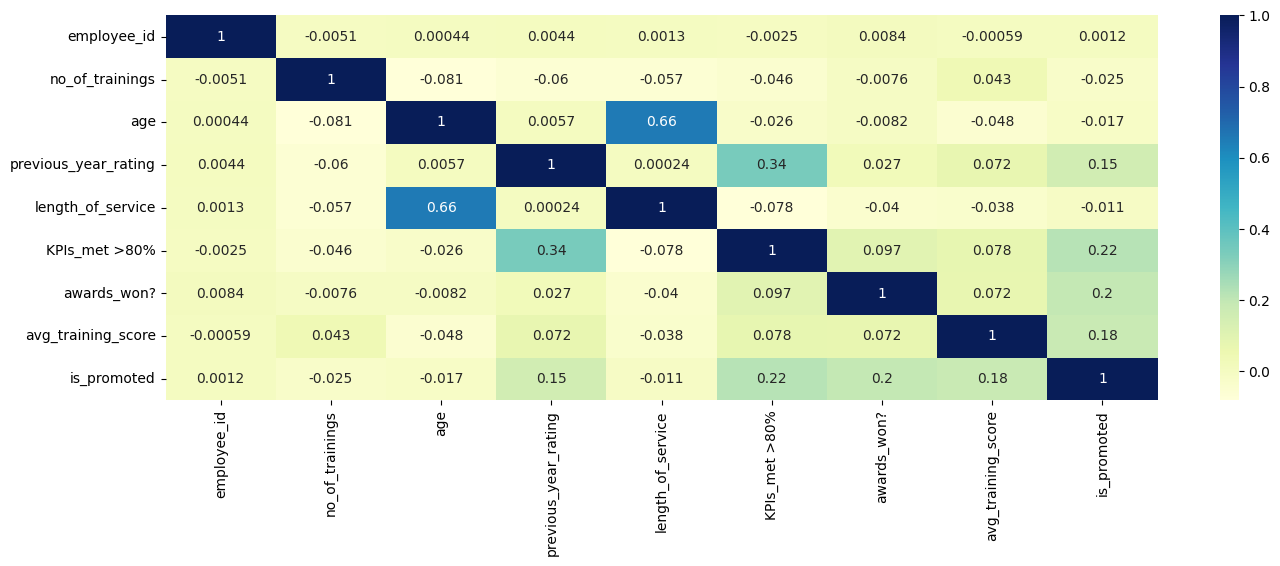

In [ ]:
# plotting correlation heatmap
plt.figure(figsize = (16,5))
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
# # As employee_id has no impact on target variable considered dropping it
# train=train.drop(['employee_id'],axis=1)

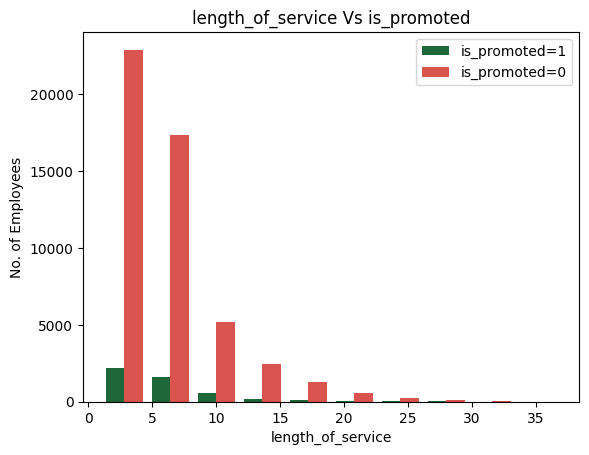

In [ ]:
length_of_service_promoted = train[train.is_promoted==1].length_of_service
length_of_service_notpromoted = train[train.is_promoted==0].length_of_service

plt.title("length_of_service Vs is_promoted")
plt.xlabel("length_of_service")
plt.ylabel("No. of Employees")
plt.hist([length_of_service_promoted,length_of_service_notpromoted],color=['#1e6738','#d9534f'],label=['is_promoted=1','is_promoted=0'])
plt.legend()

In [ ]:
train.rename(columns = {'KPIs_met >80%':'KPIs_met'}, inplace = True)

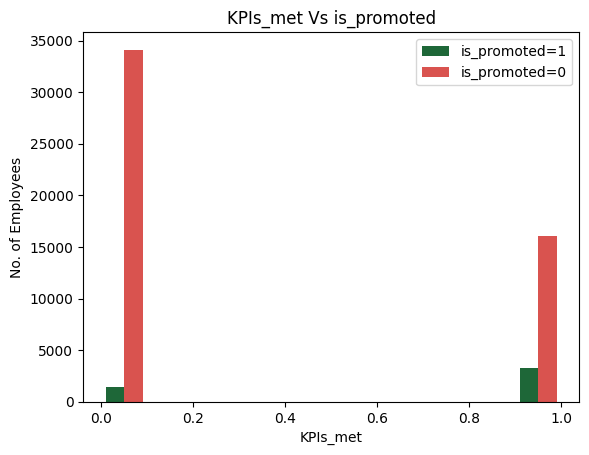

In [ ]:
KPIs_met_promoted = train[train.is_promoted==1].KPIs_met
KPIs_met_notpromoted = train[train.is_promoted==0].KPIs_met

plt.title("KPIs_met Vs is_promoted")
plt.xlabel("KPIs_met")
plt.ylabel("No. of Employees")
plt.hist([KPIs_met_promoted,KPIs_met_notpromoted],color=['#1e6738','#d9534f'],label=['is_promoted=1','is_promoted=0'])
plt.legend()

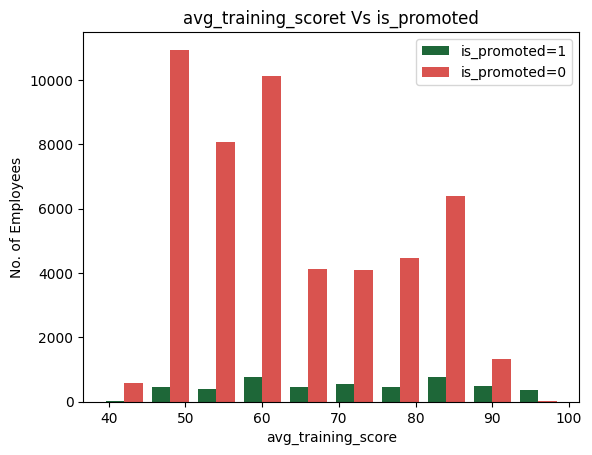

In [ ]:
avg_training_score_promoted = train[train.is_promoted==1].avg_training_score
avg_training_score_notpromoted = train[train.is_promoted==0].avg_training_score

plt.title("avg_training_scoret Vs is_promoted")
plt.xlabel("avg_training_score")
plt.ylabel("No. of Employees")
plt.hist([avg_training_score_promoted,avg_training_score_notpromoted],color=['#1e6738','#d9534f'],label=['is_promoted=1','is_promoted=0'])
plt.legend()

**Data Pre-processing**

In [ ]:
train.select_dtypes(include=['object']).columns.tolist()

['department', 'region', 'education', 'gender', 'recruitment_channel']

In [ ]:
train['gender'].value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [ ]:
train['education'].value_counts()

Bachelor's          39078
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [ ]:
train['recruitment_channel'].value_counts()

other       30446
sourcing    23220
referred     1142
Name: recruitment_channel, dtype: int64

In [ ]:
train['department'].value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

In [ ]:
train['region'].value_counts()

region_2     12343
region_22     6428
region_7      4843
region_15     2808
region_13     2648
region_26     2260
region_31     1935
region_4      1703
region_27     1659
region_16     1465
region_28     1318
region_11     1315
region_23     1175
region_29      994
region_32      945
region_19      874
region_20      850
region_14      827
region_25      819
region_17      796
region_5       766
region_6       690
region_30      657
region_8       655
region_10      648
region_1       610
region_24      508
region_12      500
region_9       420
region_21      411
region_3       346
region_34      292
region_33      269
region_18       31
Name: region, dtype: int64

In [ ]:
train['region'].nunique()

34

In [ ]:
# Encoding the Categorical variables

 

*   Frequency encoding can be useful in machine learning models,especially for tree-based models, because it preserves the order and provides a meaningful representation of the categories based on their frequency.
*  Label encoding and one-hot encoding can increase the dimensionality of the dataset, whereas frequency encoding does not.



In [ ]:
def label_categorical_data(train):
    # map 'gender' to binary values
    train['gender'] = train['gender'].map({"m":0, "f":1})   
     
    # map 'education' to numeric values
    train['education'] = train['education'].map({"Below Secondary":0, "Bachelor's":1, "Master's & above":2})
    
    # frequency encode nominal features
    nominal_features = ['department', 'region', 'recruitment_channel']
    for feat in nominal_features:
        freq = train[feat].value_counts(normalize=True)
        mapping_dict = freq.to_dict()
        train[feat] = train[feat].map(mapping_dict)
        
    return train

In [ ]:
label_categorical_data(train)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,0.307254,0.088363,2,1,0.423661,1,35,5.0,8,1,0,49,0
1,65141,0.207050,0.117282,1,0,0.555503,1,30,5.0,4,0,0,60,0
2,7513,0.307254,0.015947,1,0,0.423661,1,34,3.0,7,0,0,50,0
3,2542,0.307254,0.021438,1,0,0.555503,2,39,1.0,10,0,0,50,0
4,48945,0.130236,0.041235,1,0,0.555503,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,0.130236,0.015089,1,0,0.423661,1,48,3.0,17,0,0,78,0
54804,74592,0.207050,0.030269,2,1,0.555503,1,37,2.0,6,0,0,56,0
54805,13918,0.097650,0.011130,1,0,0.555503,1,27,5.0,3,1,0,79,0
54806,13614,0.307254,0.007663,1,0,0.423661,1,29,1.0,2,0,0,45,0


In [ ]:
# there is high class imbalance
train['is_promoted'].value_counts(normalize=True) * 100

0    91.482995
1     8.517005
Name: is_promoted, dtype: float64

In [ ]:
# Seperating independent variable
X=train.drop(['is_promoted'],axis=1)

In [ ]:
X.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,65438,0.307254,0.088363,2,1,0.423661,1,35,5.0,8,1,0,49
1,65141,0.207050,0.117282,1,0,0.555503,1,30,5.0,4,0,0,60
2,7513,0.307254,0.015947,1,0,0.423661,1,34,3.0,7,0,0,50
3,2542,0.307254,0.021438,1,0,0.555503,2,39,1.0,10,0,0,50
4,48945,0.130236,0.041235,1,0,0.555503,1,45,3.0,2,0,0,73


In [ ]:
# Seperating Target variable
y=train['is_promoted']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_promoted, dtype: int64

In [ ]:
# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
# Split and hold the data for evaluating the model
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42,stratify=y)

In [ ]:
# pip install lightgbm

In [ ]:
# Initiate the model
lgb=LGBMClassifier(learning_rate=0.1, n_estimators=100)

In [ ]:
# Train the desired model
lgb.fit(x_train,y_train)

LGBMClassifier()

In [ ]:
print("Precision: ", precision_score(y_test, y_pred_train,average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_train,average='weighted'))
print("F1 score: ",f1_score(y_test, y_pred_train,average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred_train))

Precision:  0.9405639572960048
Recall:  0.9412515964240102
F1 score:  0.9283359282494187
Accuracy:  0.9412515964240102


In [ ]:
# model.fit(x_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50


LGBMClassifier(max_bin=64, min_data_in_leaf=50, objective='binary',
               scale_pos_weight=10)

In [ ]:
y_pred=model.predict(x_test)

In [ ]:
print("Precision: ", precision_score(y_test, y_pred,average='weighted'))
print("Recall: ", recall_score(y_test, y_pred,average='weighted'))
print("F1 score: ",f1_score(y_test, y_pred,average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred))

Precision:  0.9205763690562672
Recall:  0.7690202517788725
F1 score:  0.8176246518443794
Accuracy:  0.7690202517788725


In [ ]:
param_grid = {
    'max_bin':[300,320,340],
    'num_leaves': [10, 20, 30],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 200],
    'min_child_samples': [5, 10, 20],
}

# define the stratified k-fold cross-validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(lgb, param_grid=param_grid,scoring='f1_weighted',cv=5)
grid_search.fit(x_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_bin': 300, 'min_child_samples': 20, 'n_estimators': 100, 'num_leaves': 20}
Best score: 0.9276439442979033


In [ ]:
final_model=LGBMClassifier(learning_rate=0.1,max_bin=300,min_child_samples=20,n_estimators=100,num_leaves=20)

In [ ]:
final_model.fit(x_train,y_train)

In [ ]:
y_pred_train=final_model.predict(x_test)

In [ ]:
print("Precision: ", precision_score(y_test, y_pred_train,average='weighted'))
print("Recall: ", recall_score(y_test, y_pred_train,average='weighted'))
print("F1 score: ",f1_score(y_test, y_pred_train,average='weighted'))
print("Accuracy: ", accuracy_score(y_test, y_pred_train))

Precision:  0.9399533496887734
Recall:  0.9410691479656997
F1 score:  0.9282434731138121
Accuracy:  0.9410691479656997


In [ ]:
test=pd.read_csv('/content/test_HRAnalytics.csv')

In [ ]:
test.shape

(23490, 13)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23490 entries, 0 to 23489
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           23490 non-null  int64  
 1   department            23490 non-null  object 
 2   region                23490 non-null  object 
 3   education             22456 non-null  object 
 4   gender                23490 non-null  object 
 5   recruitment_channel   23490 non-null  object 
 6   no_of_trainings       23490 non-null  int64  
 7   age                   23490 non-null  int64  
 8   previous_year_rating  21678 non-null  float64
 9   length_of_service     23490 non-null  int64  
 10  KPIs_met >80%         23490 non-null  int64  
 11  awards_won?           23490 non-null  int64  
 12  avg_training_score    23490 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.3+ MB


In [ ]:
test.drop()

In [ ]:
impute_missing_values(test)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,3.339146,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.000000,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.000000,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.000000,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.000000,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.000000,1,0,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.000000,7,0,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.000000,4,0,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,3.339146,1,0,0,70


In [ ]:
test.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
dtype: int64

In [ ]:
label_categorical_data(test)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,0.128182,0.043040,1,0,0.424053,1,24,3.339146,1,1,0,77
1,74430,0.046190,0.032993,1,1,0.556748,1,31,3.000000,5,0,0,51
2,72255,0.311409,0.049681,1,0,0.556748,1,31,1.000000,4,0,0,47
3,38562,0.128565,0.225585,1,1,0.556748,3,31,2.000000,9,0,0,65
4,64486,0.046445,0.017625,1,0,0.424053,1,30,4.000000,7,0,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,0.018944,0.225585,0,0,0.424053,1,24,3.000000,1,0,0,61
23486,25600,0.128182,0.014347,1,0,0.424053,1,31,3.000000,7,0,0,74
23487,45409,0.046190,0.025117,1,1,0.424053,1,26,4.000000,4,0,0,50
23488,1186,0.128565,0.035930,1,0,0.424053,3,27,3.339146,1,0,0,70


In [ ]:
scaler = StandardScaler()
test_scaled = scaler.fit_transform(test)

In [ ]:
y_pred_test = final_model.predict(test_scaled)

In [ ]:
type(test_scaled)

numpy.ndarray

In [ ]:
type(y_pred_test)

numpy.ndarray

In [ ]:
test_final=pd.DataFrame(test_scaled,columns=['employee_id','department','region','education','gender','recruitment_channel','no_of_trainings','age', 'previous_year_rating','length_of_service','KPIs_met >80% ','awards_won?','avg_training_score'])

In [ ]:
test_final.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,-1.339088,-0.593801,-0.539528,-0.550518,-0.644516,-0.713640,-0.423094,-1.404150,0.000000,-1.143200,1.336715,-0.152665,1.024263
1,1.563078,-1.438601,-0.662938,-0.550518,1.551551,0.718886,-0.423094,-0.492612,-0.279463,-0.192590,-0.748103,-0.152665,-0.914377
2,1.467011,1.294060,-0.457951,-0.550518,-0.644516,0.718886,-0.423094,-0.492612,-1.927501,-0.430243,-0.748103,-0.152665,-1.212629
3,-0.021175,-0.589854,1.702783,-0.550518,1.551551,0.718886,2.905264,-0.492612,-1.103482,0.758019,-0.748103,-0.152665,0.129506
4,1.123862,-1.435970,-0.851715,-0.550518,-0.644516,-0.713640,-0.423094,-0.622832,0.544557,0.282714,-0.748103,-0.152665,-0.168746


In [ ]:
test_final['Prediction']=y_pred_test

In [ ]:
test_final.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,Prediction
0,-1.339088,-0.593801,-0.539528,-0.550518,-0.644516,-0.713640,-0.423094,-1.404150,0.000000,-1.143200,1.336715,-0.152665,1.024263,0
1,1.563078,-1.438601,-0.662938,-0.550518,1.551551,0.718886,-0.423094,-0.492612,-0.279463,-0.192590,-0.748103,-0.152665,-0.914377,0
2,1.467011,1.294060,-0.457951,-0.550518,-0.644516,0.718886,-0.423094,-0.492612,-1.927501,-0.430243,-0.748103,-0.152665,-1.212629,0
3,-0.021175,-0.589854,1.702783,-0.550518,1.551551,0.718886,2.905264,-0.492612,-1.103482,0.758019,-0.748103,-0.152665,0.129506,0
4,1.123862,-1.435970,-0.851715,-0.550518,-0.644516,-0.713640,-0.423094,-0.622832,0.544557,0.282714,-0.748103,-0.152665,-0.168746,0


# **Feature Importance**

In [ ]:
feature_importance = lgb.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=True)

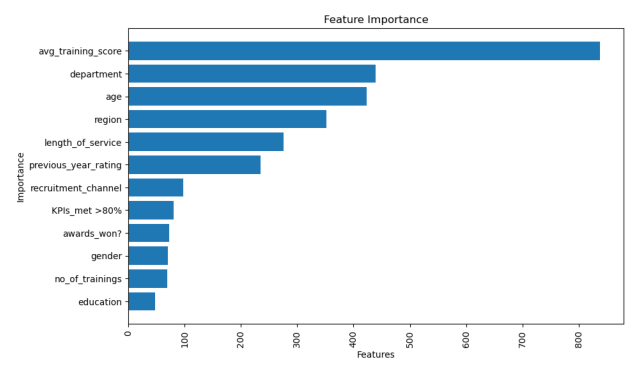

In [ ]:
# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

**Inferences:**


*   Imputing missing values based on their relative distributions will have impact on model performance
*   **Frequency encoding** reduces dimensionality unlike one-hot encoding and retains valuable information which boosts model performance.
*   **Light Gradient Boosting** is a robust model for outliers and class imbalnces
*   Average Training Score is most important parameter to consider promoting an employee to higher level
*  Department, age, region and length of service are also considerable parameters as particular department and specific region has larger scope when compared to others.
*   Eductaion and Gender are least important factors in deciding a person eligible for promotion

